In [17]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [18]:
from fastbook import *
from fastai.vision.widgets import *

In [19]:
key = os.environ.get('AZURE_SEARCH_KEY', '766fc4beb42d40e09e03de7cd9020bfc')

In [20]:
# Test code
# download data
people_types = ['glasses asian female', 'asian male']
people_path = Path('people')
if not people_path.exists():
    people_path.mkdir()
    for o in people_types:
        dest = (people_path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('contentUrl'))

print(people_path)

people


In [21]:
# clean up data
fns = get_image_files(people_path)
failed = verify_images(fns)
print(failed)
failed.map(Path.unlink);



[]


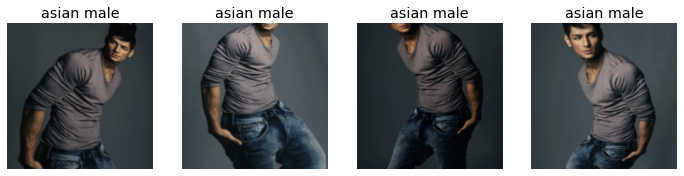

In [28]:
# create data loader
people = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
# conduct radomised cropping + transformations to increase dataset size
people = people.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = people.dataloaders(people_path)
# check data loaders
# dls.valid.show_batch(max_n=4, nrows=1)

dls.train.show_batch(max_n=4, nrows=1, unique=True)

# misc
# print(ims)
# test_results = search_images_bing(key, "Microsoft")
# urls = test_results.attrgot('contentUrl')
# print(urls)

In [29]:
# train and get results
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.234403,1.319936,0.425926,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.430248,0.326405,0.166667,00:08
1,0.274214,0.088229,0.055556,00:09
2,0.219191,0.032315,0.000000,00:09
3,0.185750,0.022299,0.000000,00:09


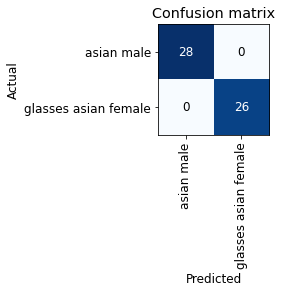

In [30]:
# checking confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

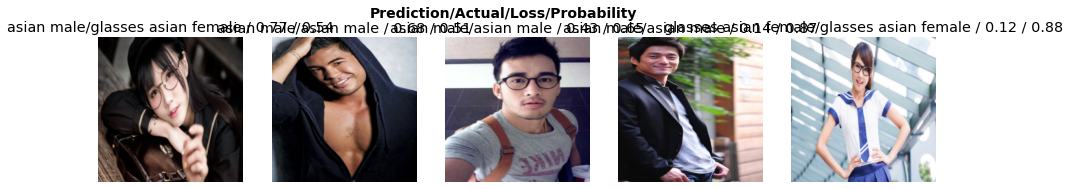

In [25]:
# Find top losses (ie most confusing)
interp.plot_top_losses(5, nrows=1)



In [26]:
# create a cleaner to identify poor data
cleaner = ImageClassifierCleaner(learn)
cleaner

In [27]:
# clean up the data
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [31]:
# export model
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [40]:
learn_inf.dls.vocab = ['老公','老婆']

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [58]:
#check img that is uploaded
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [44]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
# modify label predictions
new_label = {'asian male': '老公', 'glasses asian female': '老婆'}
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {new_label[pred]}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 老公; Probability: 0.9629')

In [49]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [56]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {new_label[pred]}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your photo!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [59]:
# export to voila
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.7 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 558 kB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 397 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 13.6 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.2 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.3.1 OK
